In [0]:
import os
from Audio_reader import readtf
from getman import getmanlist
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D,SpatialDropout1D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers
from sklearn.metrics import confusion_matrix

In [0]:
def check(y):
    if 74 in y:
        return 0 
    #male
    if 1 in y:
        return 1
    #female
    if 2 in y:
        return 2
    #child
    if 3 in y:
        return 3
    return 0

In [0]:
X = []
Y = [] 
with open("X_list_eval.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list_eval.pickle","rb") as xf:
    Y.extend(pickle.load(xf))
      
with open("X_list.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list.pickle","rb") as xf:
    Y.extend(pickle.load(xf))

X=np.array(X)
X=np.reshape(X,(X.shape[0],X.shape[2],X.shape[1]))

Y=np.array(Y)  

X = X.astype('float32')    
X /= 255


In [0]:
learning_rate=0.001
#decay=0.00003
momentum=0.99
dropout_rate = 0.22

rglrzr = regularizers.l2(0.0015)

In [56]:
model = Sequential()
model.add(Conv1D(64, 4, padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Conv1D(64, 4, padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))

model.add(Conv1D(128, 2, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(128, 2, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))


model.add(Conv1D(256, 2, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(256, 2, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(256, 1, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))

model.add(Conv1D(512, 2, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 2, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 1, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))


model.add(Conv1D(512, 4, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 4, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv1D(512, 1, padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(rate=dropout_rate))
model.add(SpatialDropout1D(rate=dropout_rate))



model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_157 (Conv1D)          (None, 128, 64)           2624      
_________________________________________________________________
batch_normalization_157 (Bat (None, 128, 64)           256       
_________________________________________________________________
conv1d_158 (Conv1D)          (None, 128, 64)           16448     
_________________________________________________________________
batch_normalization_158 (Bat (None, 128, 64)           256       
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 32, 64)            0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
spatial_dropout1d_59 (Spatia (None, 32, 64)            0         
__________

In [0]:

optimizer = optimizers.SGD(lr=learning_rate,momentum=momentum)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [0]:
cb=[]

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

cb.append(reduce_lr)
cb.append(early_stopping)

In [59]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=200,
          verbose=2,
          callbacks=cb,
          validation_split=0.2,
          shuffle=True)

Train on 506 samples, validate on 127 samples
Epoch 1/200
 - 15s - loss: 2.2101 - acc: 0.4684 - val_loss: 2.8539 - val_acc: 0.5118
Epoch 2/200
 - 1s - loss: 1.6333 - acc: 0.3360 - val_loss: 7.5888 - val_acc: 0.5197
Epoch 3/200
 - 1s - loss: 1.1806 - acc: 0.4585 - val_loss: 7.7420 - val_acc: 0.5197
Epoch 4/200
 - 1s - loss: 1.0100 - acc: 0.6028 - val_loss: 7.7421 - val_acc: 0.5197
Epoch 5/200
 - 1s - loss: 0.9547 - acc: 0.6067 - val_loss: 7.7423 - val_acc: 0.5197
Epoch 6/200
 - 1s - loss: 0.9840 - acc: 0.6028 - val_loss: 7.7424 - val_acc: 0.5197
Epoch 7/200
 - 1s - loss: 0.9679 - acc: 0.6047 - val_loss: 7.7426 - val_acc: 0.5197
Epoch 8/200
 - 1s - loss: 0.9549 - acc: 0.6047 - val_loss: 7.7427 - val_acc: 0.5197
Epoch 9/200
 - 1s - loss: 0.9467 - acc: 0.6047 - val_loss: 7.7429 - val_acc: 0.5197
Epoch 10/200
 - 1s - loss: 0.9812 - acc: 0.6047 - val_loss: 7.6191 - val_acc: 0.5197
Epoch 11/200
 - 1s - loss: 0.9332 - acc: 0.6047 - val_loss: 2.7196 - val_acc: 0.5197
Epoch 12/200
 - 1s - loss: 

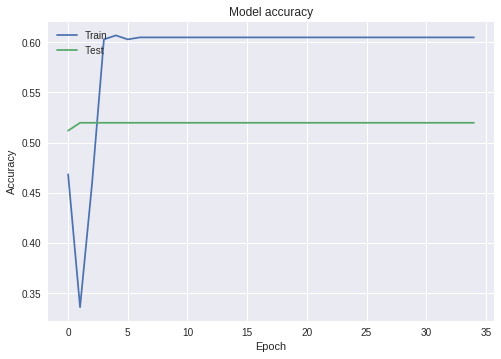

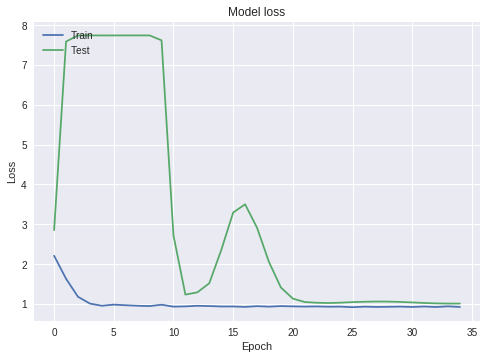

In [60]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X)
def maxpos(li):
      if (li[1]>li[0]) and (li[1]>li[2])  :
        return 1
      if (li[2]>li[0]) and (li[2]>li[1])  :
        return 2     
      return 0
y_pre=[maxpos(y) for y in y_pred]
y_tes=[maxpos(y) for y in Y]

In [62]:
confusion_matrix(y_true=y_tes,y_pred=y_pre)

array([[  0,   0, 125],
       [  0,   0, 136],
       [  0,   0, 372]])

In [0]:
model.save('VGG-ish_74_ex65.model')